## 데이터 불러오기

In [54]:
from tensorflow.keras.datasets import imdb
(train_input, train_target),(test_input,test_target) = imdb.load_data(num_words=500)
train_input.shape,test_input.shape

((25000,), (25000,))

In [55]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [56]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 0 은 부정적인 문장
- 1 은 긍정적인 문장

In [57]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


- 훈련 데이터 테스트 데이터 분리 

In [58]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [59]:
train_input.shape, val_input.shape, train_target.shape, val_target.shape

((20000,), (5000,), (20000,), (5000,))

In [60]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [61]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


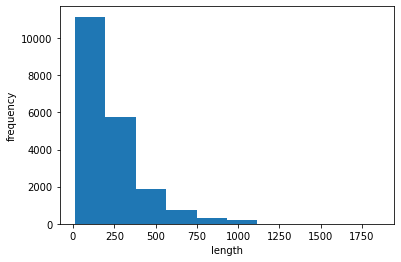

In [62]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

- 20,000개의 리뷰를 순회하면서 길이가 100이 되도록 잘라낸다.
- 100개보다 적은 문장은 0으로 채운다.

In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [64]:
print(train_seq.shape)

(20000, 100)


In [65]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [66]:
print(train_input[0])

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 2, 2, 66, 45, 6, 20, 15, 497, 8, 79, 17, 491, 8, 112, 6, 2, 20, 17, 2, 2, 4, 436, 20, 9, 2, 6, 2, 7, 493, 2, 6, 185, 250, 24, 55, 2, 5, 23, 350, 7, 15, 82, 24, 15, 2, 66, 10, 10, 45, 2, 15, 4, 20, 2, 8, 30, 17, 2, 5, 2, 17, 2, 190, 4, 20, 9, 43, 32, 99, 2, 18, 15, 8, 157, 46, 17, 2, 4, 2, 5, 2, 9, 32, 2, 5, 2, 267, 17, 73, 17, 2, 36, 26, 400, 43, 2, 83, 4, 2, 247, 74, 83, 4, 250, 2, 82, 4, 96, 4, 250, 2, 8, 32, 4, 2, 9, 184, 2, 13, 384, 48, 14, 16, 147, 2, 59, 62, 69, 2, 12, 46, 50, 9, 53, 2, 74, 2, 11, 14, 31, 151, 10, 10, 4, 20, 9, 2, 364, 352, 5, 45, 6, 2, 2, 33, 269, 8, 2, 142, 2, 5, 2, 17, 73, 17, 204, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 215, 69, 224, 142, 73, 237, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 451, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [67]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [68]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [69]:
val_seq = pad_sequences(val_input, maxlen=100)

In [70]:
train_seq.shape, val_seq.shape

((20000, 100), (5000, 100))

## 순환 싱경망 모델 만들기 

In [71]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))  

In [72]:
train_oh = keras.utils.to_categorical(train_seq)

In [73]:
print(train_oh.shape)

(20000, 100, 500)


쭉쭉 혼자 해보기

## p.527 LSTM과 GRU 셀

- LSTM 
- 단기기억을 오래 기억하기 위해 고안되었다.

- LSTM 신경망 훈련하기

In [74]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

- 패딩작업

In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

- LSTM 순환층을 만든다.
- 모델 아키텍처를 구성한다.

In [76]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 8)                 800       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


- 모델 컴파일 

In [77]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6927 - accuracy: 0.5253 - val_loss: 0.6917 - val_accuracy: 0.5768
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6904 - accuracy: 0.5979 - val_loss: 0.6879 - val_accuracy: 0.6254
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6792 - accuracy: 0.6683 - val_loss: 0.6608 - val_accuracy: 0.6896
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6317 - accuracy: 0.7040 - val_loss: 0.6146 - val_accuracy: 0.7002
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5967 - accuracy: 0.7181 - val_loss: 0.5888 - val_accuracy: 0.7182
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5697 - accuracy: 0.7397 - val_loss: 0.5677 - val_accuracy: 0.7366
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5451 - accuracy: 0.7575 - val_loss: 0.5423 - val_accuracy: 0.

- 모형 학습이 잘 되었는가 

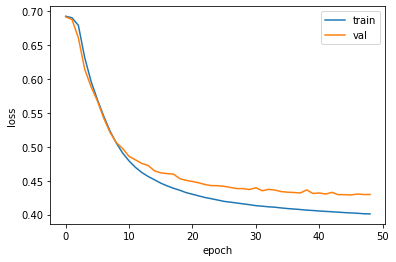

In [78]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [79]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [80]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 11ms/step - loss: 0.6929 - accuracy: 0.5173 - val_loss: 0.6923 - val_accuracy: 0.5548
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6913 - accuracy: 0.5687 - val_loss: 0.6903 - val_accuracy: 0.6040
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6879 - accuracy: 0.6148 - val_loss: 0.6853 - val_accuracy: 0.6300
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6765 - accuracy: 0.6352 - val_loss: 0.6638 - val_accuracy: 0.6400
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6260 - accuracy: 0.6812 - val_loss: 0.6055 - val_accuracy: 0.7116
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5882 - accuracy: 0.7272 - val_loss: 0.5801 - val_accuracy: 0.7284
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5678 - accuracy: 0.7411 - val_loss: 0.5617 - val_accuracy:

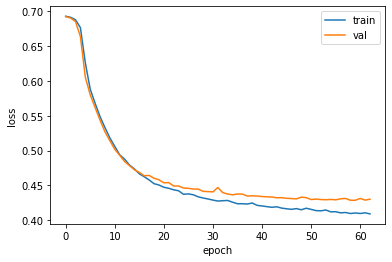

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 2 개의 층을 연결하

In [82]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))

model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [83]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_6 (LSTM)               (None, 100, 8)            800       
                                                                 
 dense_9 (Dense)             (None, 100, 1)            9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________
